### Experiments

#### Import Libraries

In [12]:
from utils.data_utils import split_dataset, TimeSeriesDataset
from utils.evaluation_utils import plot_multistep_forecast
from utils.training_utils import train
import pandas as pd 
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

#### Import Data

In [13]:
ETTh2 = pd.read_csv("/workspaces/time_series_experiment/ETT-small/ETTh2.csv")
training_df, test_df = split_dataset(ETTh2, remain_same = False)

#### Multivariate Case

#### Global Parameters

In [14]:
p_lag = 48
future_steps = 24
batch_size = 8
epochs = 8
learning_rate=1.e-4
decomp_kernel_size = 24
number_of_forecasts = 100
target_column = ['OT']
feature_columns = [i for i in training_df.columns]
modelling_task = 'univariate'
n_continous_features=7
n_categorial_features=5
dataset_name = 'ETTh2'

#### ETTm2

#### RLinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Rlinear activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------
Current (running) training loss at iteration 5000 : 15.720320374679565


Current (running) training loss at iteration 10000 : 14.252744637680054

Epoch 0: 

Train metrics: -------
Running (training) loss is 13.587772676789065.
Training MAE is 1.0129689300592821.
Training MSE is 14.280820485652518.

Test metrics: -------
Running (test) loss is 7.22615419285638.
Test MAE is 0.7664060590096883.
Test MSE is 7.944928442920958.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 6.612144106483459
Current (running) training loss at iteration 10000 : 6.757058633279801

Epoch 1: 

Train metrics: -------
Running (training) loss is 6.649201874429827.
Training MAE is 0.7383857484945316.
Training MSE is 7.459268277207601.

Test metrics: -------
Running (test) loss is 4.508496943541935.
Test MAE is 0.6253097242968423.
Test MSE is 5.262445093733924.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 500

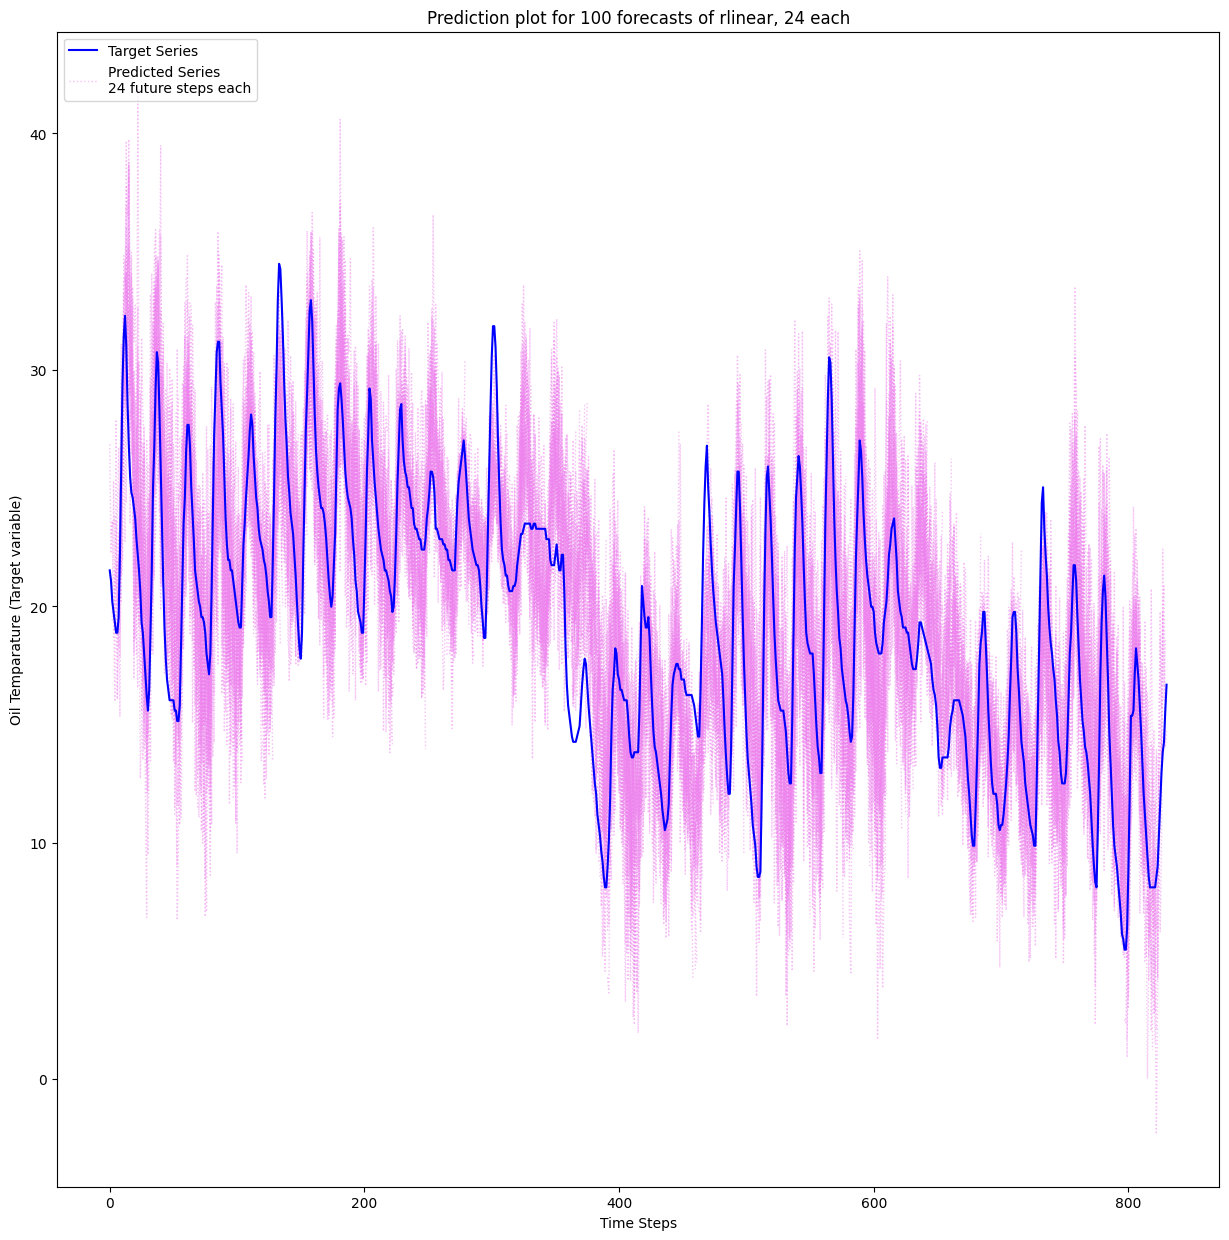

In [15]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### Dlinear

Random seed set as 42
Univatiate modelling
inflation factor = 1
Dlinear activated
Points to be estimated
With a shallow network
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 16.578410717773437
Current (running) training loss at iteration 10000 : 15.540342207336426

Epoch 0: 

Train metrics: -------
Running (training) loss is 14.752446526596227.
Training MAE is 1.0675003875162183.
Training MSE is 15.20373772296709.

Test metrics: -------
Running (test) loss is 12.946802353177752.
Test MAE is 1.049306889942714.
Test MSE is 13.61224849155971.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 10.208829491424561
Current (running) training loss at iteration 10000 : 10.652284110260009

Epoch 1: 

Train metrics: -------
Running (training) loss is 10.301694972408596.
Training MAE is 0.9238378161826903.
Training MSE is 11.019776831951338.

Test metrics: -------
Running (test) loss is 12.5503796849932.
Test MAE is 1.0438054604189737.
Test MSE is 13.269960133688791.
---------------------------
Current learning rate is : 5e-05
-

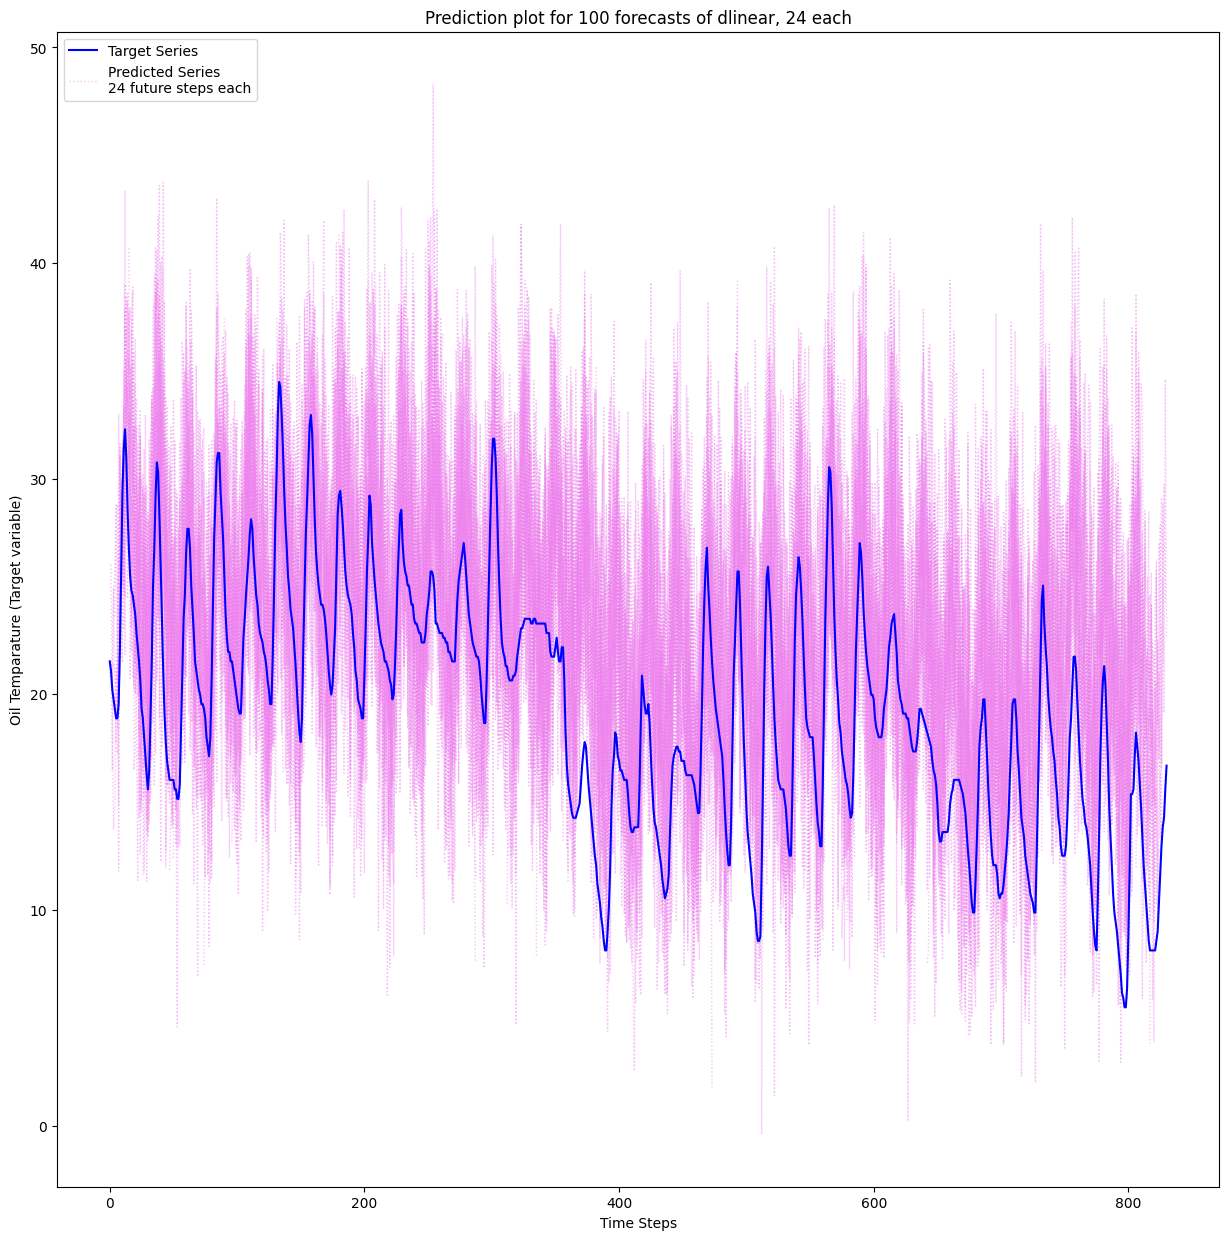

In [16]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'dlinear', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)

#### RLMP

Random seed set as 42
Univatiate modelling
inflation factor = 1
RMLP activated
Points to be estimated
Current learning rate is : 0.0001
---------------------------


Current (running) training loss at iteration 5000 : 21.220479703998567
Current (running) training loss at iteration 10000 : 14.904428937101365

Epoch 0: 

Train metrics: -------
Running (training) loss is 13.696695344103981.
Training MAE is 0.9851126306245417.
Training MSE is 14.355943192731065.

Test metrics: -------
Running (test) loss is 4.71954714672906.
Test MAE is 0.6371280407905578.
Test MSE is 5.476540728296553.
---------------------------
Current learning rate is : 5e-05
---------------------------
Current (running) training loss at iteration 5000 : 3.391776358509064
Current (running) training loss at iteration 10000 : 3.8540528564929963

Epoch 1: 

Train metrics: -------
Running (training) loss is 3.8084482211837245.
Training MAE is 0.57897403476779.
Training MSE is 4.587671183802418.

Test metrics: -------
Running (test) loss is 2.828066535762378.
Test MAE is 0.5148597611699786.
Test MSE is 3.5965944669076375.
---------------------------
Current learning rate is : 5e-05
----

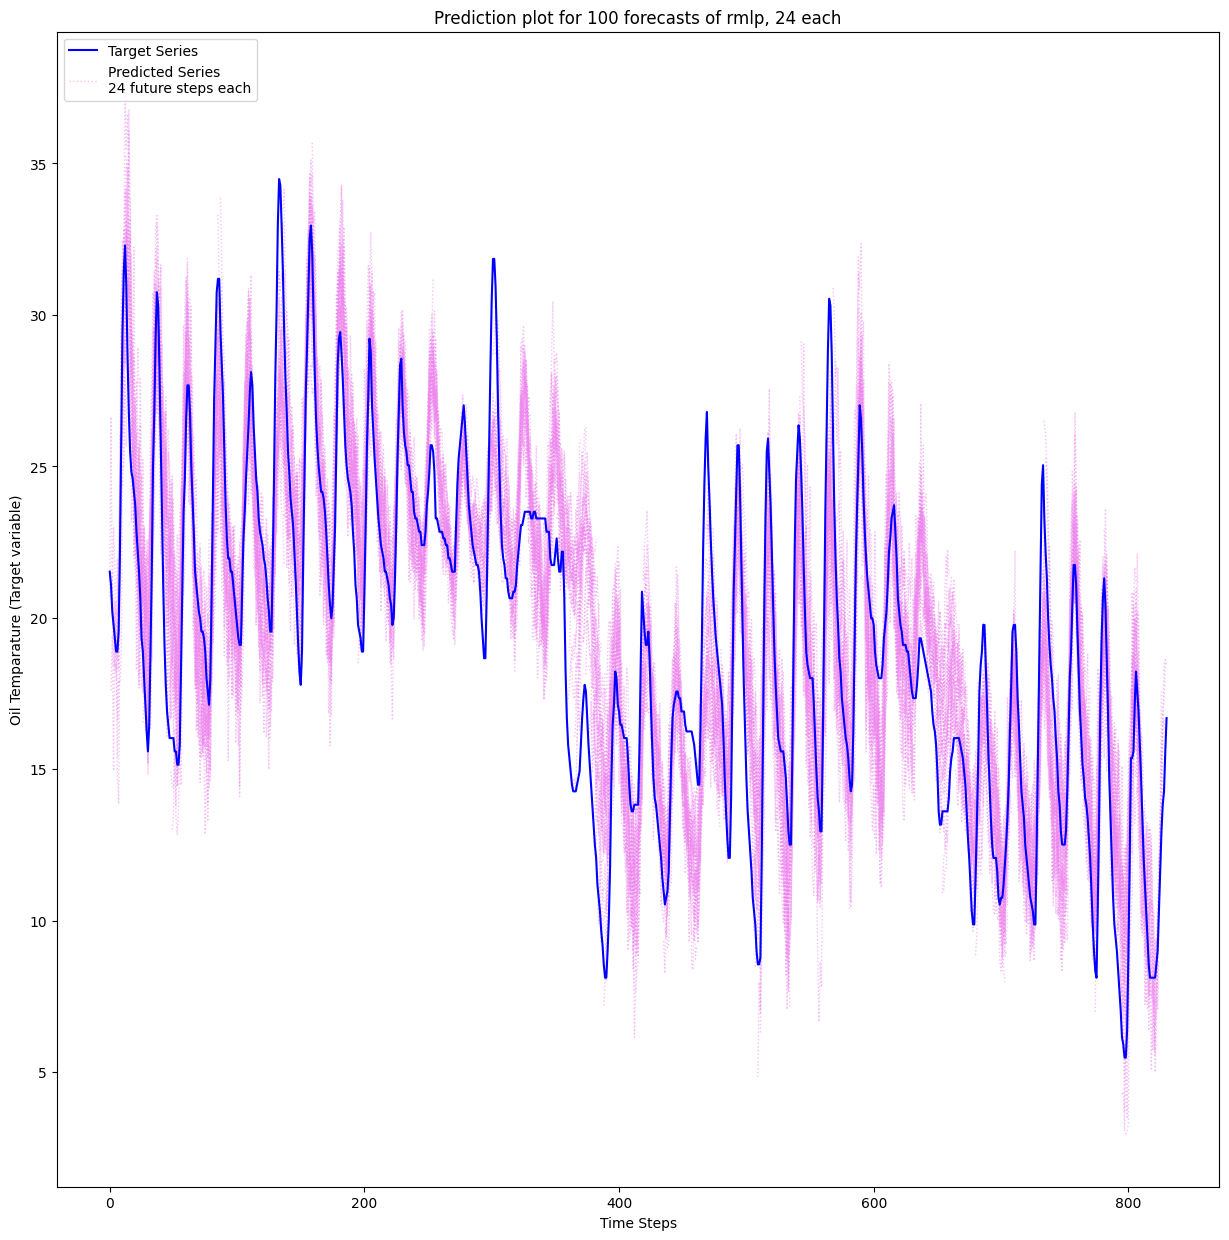

In [17]:
net = train(
            epochs = epochs, 
            n_continous_features=n_continous_features, 
            n_categorial_features=n_categorial_features,
            p_lag=  p_lag, 
            future_steps = future_steps, 
            training_df = training_df, 
            validation_df = test_df, 
            feature_columns = feature_columns,
            target_column = target_column, 
            learning_rate=learning_rate ,
            decomp_kernel_size= decomp_kernel_size, 
            batch_size=batch_size, 
            model = 'rmlp', 
            modelling_task = modelling_task, 
            dataset_name = dataset_name
            )
test_data = DataLoader(TimeSeriesDataset(test_df, future_steps= future_steps, target_column = target_column,feature_columns=feature_columns,p_lag=p_lag), batch_size=batch_size,drop_last=True)
plot_multistep_forecast(test_data=test_data, dataset_name = dataset_name, neural_net=net, future_steps=future_steps, number_of_forecasts=number_of_forecasts)